In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.model_selection import GridSearchCV
import graphviz 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, export_text
import graphviz  
from sklearn.tree import export_graphviz

import sklearn

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
# Load dataset and create WINS and SEED^2 features.
df = pd.read_csv("Datasets/KenPom Barttorvik.csv") 
df['WINS'] = (df.ROUND==32) + 2*(df.ROUND==16)+ 3*(df.ROUND==8) + 4*(df.ROUND==4)+5*(df.ROUND==2)+6*(df.ROUND==1)
df['SEED2'] = df['SEED']**2
df

,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK,WINS,SEED2
0,2024,MAC,17,61,1,1079,2,Akron,14,64,...,199,19,176,164,47,122,51,249,0,196
1,2024,SEC,28,63,3,1078,3,Alabama,4,4,...,8,156,106,10,314,2,263,7,4,16
2,2024,P12,24,63,3,1077,8,Arizona,2,16,...,37,196,7,195,134,8,14,47,2,4
3,2024,SEC,28,64,4,1076,12,Auburn,4,64,...,76,127,69,59,284,12,8,69,0,16
4,2024,B12,7,63,3,1075,14,Baylor,3,32,...,22,304,34,97,254,15,155,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,2008,BE,8,1,1,5,235,West Virginia,7,16,...,115,181,61,209,16,22,32,49,2,49
1075,2008,SB,26,1,1,4,236,Western Kentucky,12,16,...,179,55,131,127,214,27,28,203,2,144
1076,2008,BSth,10,4,4,3,239,Winthrop,13,64,...,206,89,236,339,190,170,12,179,0,169
1077,2008,B10,6,3,3,2,240,Wisconsin,3,16,...,35,98,12,118,117,60,2,57,2,9


In [4]:
df.shape

(1079, 105)

In [5]:
# Denote the training set as all years but 2024's tournament (2008 to 2023 excluding 2020), and denote the test set as 2024's tournament.
df_train = df[df['YEAR'] != 2024]
df_train = df_train[df_train['ROUND'] != 68]
df_test = df[df['YEAR'] == 2024]
df_test = df_test[df_test['ROUND'] != 68]


In [6]:
# Delete features that aren't useful to this analysis
X_train = df_train.drop(['TEAM', 'CONF','CONF ID','QUAD NO', 'QUAD ID','TEAM NO','TEAM ID','ROUND','YEAR','ROUND', 'WINS'], axis=1)
y_train = df_train['WINS']
X_test = df_test.drop(['TEAM', 'CONF','CONF ID','QUAD NO', 'QUAD ID','TEAM NO','TEAM ID','ROUND','YEAR','ROUND', 'WINS'], axis=1)  
y_test = df_test['WINS']

In [7]:
X_train.columns

Index(['SEED', 'K TEMPO', 'K TEMPO RANK', 'KADJ T', 'KADJ T RANK', 'K OFF',
       'KO RANK', 'KADJ O', 'KADJ O RANK', 'K DEF', 'KD RANK', 'KADJ D',
       'KADJ D RANK', 'KADJ EM', 'KADJ EM RANK', 'BADJ EM', 'BADJ O', 'BADJ D',
       'BARTHAG', 'GAMES', 'W', 'L', 'WIN%', 'EFG%', 'EFG%D', 'FTR', 'FTRD',
       'TOV%', 'TOV%D', 'OREB%', 'DREB%', 'OP OREB%', 'OP DREB%', 'RAW T',
       '2PT%', '2PT%D', '3PT%', '3PT%D', 'BLK%', 'BLKED%', 'AST%', 'OP AST%',
       '2PTR', '3PTR', '2PTRD', '3PTRD', 'BADJ T', 'AVG HGT', 'EFF HGT', 'EXP',
       'TALENT', 'FT%', 'OP FT%', 'PPPO', 'PPPD', 'ELITE SOS', 'WAB',
       'BADJ EM RANK', 'BADJ O RANK', 'BADJ D RANK', 'BARTHAG RANK',
       'EFG% RANK', 'EFGD% RANK', 'FTR RANK', 'FTRD RANK', 'TOV% RANK',
       'TOV%D RANK', 'OREB% RANK', 'DREB% RANK', 'OP OREB% RANK',
       'OP DREB% RANK', 'RAW T RANK', '2PT% RANK', '2PT%D RANK', '3PT% RANK',
       '3PT%D RANK', 'BLK% RANK', 'BLKED% RANK', 'AST% RANK', 'OP AST% RANK',
       '2PTR RANK', '3PTR RA

In [9]:
# Fit a random forest regressor with max depth of 2 with 100 estimators, train R^2 = 0.4255, test R^2 = 0.4237
rfr = RandomForestRegressor(max_depth=2, n_estimators=100)
rfr.fit(X_train,y_train)
print(rfr.score(X_train, y_train))
rfr.score(X_test, y_test)

0.42550353897191273


0.4237101198356781

In [10]:
# Create columns with team, the target number of wns (their performance in the 2024 tournament) and the predicted number of wins based on the regressor
yh_test = rfr.predict(X_test)
predictions_df = pd.DataFrame({'TEAM':df_test['TEAM'],'Target':y_test, 'Predicted':yh_test})
predictions_df

,TEAM,Target,Predicted
0,Akron,0,0.228990
1,Alabama,4,0.944763
2,Arizona,2,2.159662
3,Auburn,0,2.448741
4,Baylor,1,1.762198
...,...,...,...
63,Wagner,0,0.228990
64,Washington St.,1,0.699811
65,Western Kentucky,0,0.234630
66,Wisconsin,0,0.852310


In [11]:
# Calculate and display MSE for each team
predictions_df['MSE'] = (predictions_df['Target']-predictions_df['Predicted'])**2
predictions_df.sort_values(by='MSE')

,TEAM,Target,Predicted,MSE
28,Kansas,1,1.021561,0.000465
41,North Carolina,2,1.975296,0.000610
32,Marquette,2,1.945659,0.002953
2,Arizona,2,2.159662,0.025492
34,Michigan St.,1,0.824090,0.030944
...,...,...,...,...
7,Clemson,3,0.812676,4.784387
12,Connecticut,6,3.757101,5.030594
3,Auburn,0,2.448741,5.996332
1,Alabama,4,0.944763,9.334475


In [12]:

predictions_df.sort_values(by='Predicted',ascending=False)

,TEAM,Target,Predicted,MSE
12,Connecticut,6,3.757101,5.030594
23,Houston,2,3.746009,3.048548
46,Purdue,5,3.496212,2.261378
3,Auburn,0,2.448741,5.996332
26,Iowa St.,2,2.276417,0.076406
...,...,...,...,...
61,Vermont,0,0.228990,0.052436
63,Wagner,0,0.228990,0.052436
9,College of Charleston,0,0.228990,0.052436
8,Colgate,0,0.228990,0.052436


In [29]:
# Sort by lowest to highest MSE, denoting the teams our model performed best on in terms of MSE.
best_predictions = predictions_df.sort_values(by='MSE').head(20)
print("Top 5 teams where the model performed the best:")
print(best_predictions)

Top 5 teams where the model performed the best:
                     TEAM  Target  Predicted       MSE
28                 Kansas       1   1.021561  0.000465
41         North Carolina       2   1.975296  0.000610
32              Marquette       2   1.945659  0.002953
2                 Arizona       2   2.159662  0.025492
34           Michigan St.       1   0.824090  0.030944
56                  Texas       1   0.812676  0.035090
57              Texas A&M       1   0.794879  0.042075
0                   Akron       0   0.228990  0.052436
31               Longwood       0   0.228990  0.052436
37           Morehead St.       0   0.228990  0.052436
48          Saint Peter's       0   0.228990  0.052436
52       South Dakota St.       0   0.228990  0.052436
30         Long Beach St.       0   0.228990  0.052436
9   College of Charleston       0   0.228990  0.052436
8                 Colgate       0   0.228990  0.052436
61                Vermont       0   0.228990  0.052436
63               

In [31]:
# Sort by highest to lowest MSE, denoting the teams our model performed worst on in terms of MSE.
worst_predictions = predictions_df.sort_values(by='MSE', ascending=False).head(20)
print("Top 5 teams where the model performed the worst:")
print(worst_predictions)

Top 5 teams where the model performed the worst:
                  TEAM  Target  Predicted        MSE
42  North Carolina St.       4   0.557870  11.848256
1              Alabama       4   0.944763   9.334475
3               Auburn       0   2.448741   5.996332
12         Connecticut       6   3.757101   5.030594
7              Clemson       3   0.812676   4.784387
16                Duke       3   1.160443   3.383970
23             Houston       2   3.746009   3.048548
46              Purdue       5   3.496212   2.261378
51      South Carolina       0   1.457246   2.123566
50       San Diego St.       2   0.835260   1.356620
20             Gonzaga       2   0.904560   1.199988
25            Illinois       3   1.940344   1.122871
55           Tennessee       3   1.967847   1.065339
29            Kentucky       0   1.013643   1.027471
66           Wisconsin       0   0.852310   0.726432
47        Saint Mary's       0   0.845687   0.715186
58          Texas Tech       0   0.825738   0.6818

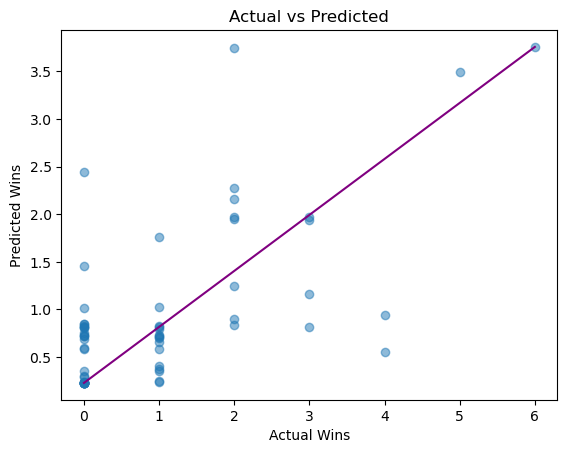

In [33]:
# Create a scatter plot displaying predicted wins and actual wins of teams, fitting a line that denotes a "perfect" prediction
plt.scatter(predictions_df['Target'], predictions_df['Predicted'], alpha=0.5)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.plot([min(predictions_df['Target']), max(predictions_df['Target'])], [min(predictions_df['Predicted']), max(predictions_df['Predicted'])], color='purple')
plt.show()

In [36]:
# Ranks teams based off of their predicted "rank" in the tournament and their actual "rank" in the tournament.
rankings_df = predictions_df[['TEAM', 'Target', 'Predicted']].copy()
rankings_df['Actual Rank'] = rankings_df['Target'].rank(ascending=False)
rankings_df['Predicted Rank'] = rankings_df['Predicted'].rank(ascending=False)
rankings_df['Rank Delta'] = rankings_df['Actual Rank'] - rankings_df['Predicted Rank']

rankings_df = rankings_df.sort_values(by='Actual Rank')
print(rankings_df)
pd.reset_option('display.max_rows')

                  TEAM  Target  Predicted  Actual Rank  Predicted Rank  \
12         Connecticut       6   3.757101          1.0             1.0   
46              Purdue       5   3.496212          2.0             3.0   
1              Alabama       4   0.944763          3.5            17.0   
42  North Carolina St.       4   0.557870          3.5            43.0   
25            Illinois       3   1.940344          6.5            10.0   
..                 ...     ...        ...          ...             ...   
35     Mississippi St.       0   0.812676         48.5            25.5   
37        Morehead St.       0   0.228990         48.5            59.0   
38            Nebraska       0   0.719037         48.5            35.0   
21       Grambling St.       0   0.234521         48.5            52.5   
33         McNeese St.       0   0.358756         48.5            46.0   

    Rank Delta  
12         0.0  
46        -1.0  
1        -13.5  
42       -39.5  
25        -3.5  
..       

In [26]:

rankings_least_to_most = rankings_df.sort_values(by='Rank Delta')


print("Rank Delta from least to most:")
print(rankings_least_to_most[['TEAM', 'Rank Delta']])

Rank Delta from least to most:
                  TEAM  Rank Delta
42  North Carolina St.       -40.0
44             Oakland       -35.0
67                Yale       -33.0
17            Duquesne       -30.0
27       James Madison       -28.0
..                 ...         ...
47        Saint Mary's        13.0
66           Wisconsin        14.0
29            Kentucky        17.0
51      South Carolina        21.0
3               Auburn        29.0

[64 rows x 2 columns]


In [27]:
rankings_most_to_least = rankings_df.sort_values(by='Rank Delta', ascending=False)


print("Rank Delta from most to least:")
print(rankings_most_to_least[['TEAM', 'Rank Delta']])

Rank Delta from most to least:
                  TEAM  Rank Delta
3               Auburn        29.0
51      South Carolina        21.0
29            Kentucky        17.0
66           Wisconsin        14.0
47        Saint Mary's        13.0
..                 ...         ...
27       James Madison       -28.0
17            Duquesne       -30.0
67                Yale       -33.0
44             Oakland       -35.0
42  North Carolina St.       -40.0

[64 rows x 2 columns]


In [28]:
# Ranks teams based off of Rank Delta, which is the rank of the absolute value of the difference in predicted and actual rank.
rankings_df['Abs Rank Delta'] = rankings_df['Rank Delta'].abs()
rankings_abs_least_to_most = rankings_df.sort_values(by='Abs Rank Delta')
print("Teams ranked by absolute value of Rank Delta from least to most:")
print(rankings_abs_least_to_most[['TEAM', 'Abs Rank Delta']])

Teams ranked by absolute value of Rank Delta from least to most:
                  TEAM  Abs Rank Delta
12         Connecticut             0.0
39              Nevada             0.0
32           Marquette             0.0
46              Purdue             1.0
18             Florida             1.0
..                 ...             ...
3               Auburn            29.0
17            Duquesne            30.0
67                Yale            33.0
44             Oakland            35.0
42  North Carolina St.            40.0

[64 rows x 2 columns]
